## Data Prepocessing Visualization

In [38]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [39]:
cwd = os.getcwd()
dataFolder = os.path.join(cwd, "../mimicdata/mimic3")
print(os.listdir(dataFolder))

labelsize = 15
rcParams['xtick.labelsize'] = labelsize
rcParams['ytick.labelsize'] = labelsize 

['train_full_hadm_ids.csv', 'disch_dev_split.csv', 'dev_full_hadm_ids.csv', 'processed_full.w2v', 'TOP_50_CODES.csv', 'PROCEDURES_ICD.csv', 'test_full.csv', 'processed_full.w2v.trainables.syn1neg.npy', 'disch_full.csv', 'processed_full.embed', 'description_vectors.vocab', 'test_50.csv', 'train_full.csv', 'train_50_hadm_ids.csv', 'ALL_CODES_filtered.csv', 'pyspark', 'train_50.csv', 'disch_test_split.csv', 'dev_full.csv', 'processed_full.w2v.wv.vectors.npy', 'dev_50.csv', 'notes_labeled.csv', 'README.md', 'ALL_CODES.csv', 'test_50_hadm_ids.csv', 'vocab.csv', 'DIAGNOSES_ICD.csv', 'test_full_hadm_ids.csv', 'disch_train_split.csv', 'dev_50_hadm_ids.csv', 'NOTEEVENTS.csv']


In [22]:
df_train = pd.read_csv(os.path.join(dataFolder, "train_full.csv"))
df_test = pd.read_csv(os.path.join(dataFolder, "test_full.csv"))
df_train_50 = pd.read_csv(os.path.join(dataFolder, "train_50.csv"))
df_test_50 = pd.read_csv(os.path.join(dataFolder, "test_50.csv"))

In [56]:
print("Training dataframe size: ", df_train.shape )
print("train data median length: ", df_train['length'].median())
print("Test data median length: ", df_test['length'].median())

Training dataframe size:  (47723, 6)
train data median length:  1341.0
Test data median length:  1683.0


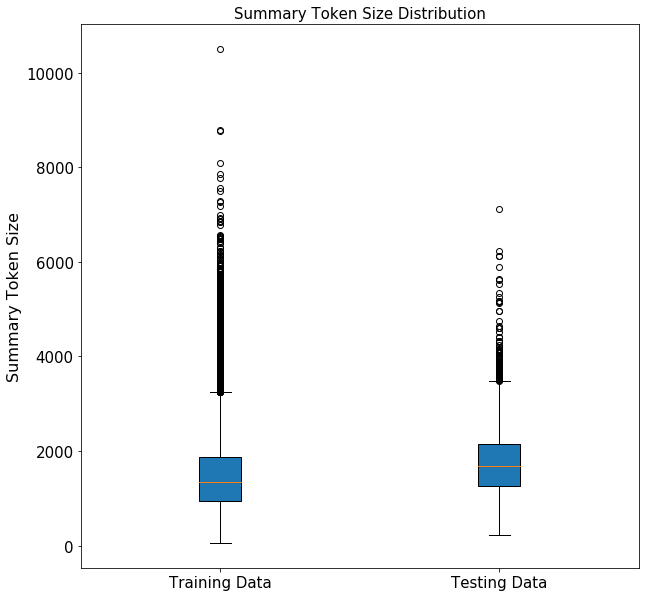

In [44]:
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.set_title('Summary Token Size Distribution', fontsize=15)
box_data = [df_train['length'], df_test['length']]
ax1.boxplot(box_data, labels=["Training Data", "Testing Data"], patch_artist=True)
ax1.set_ylabel("Summary Token Size", fontsize=16)
fig1.savefig("token_size.png")

In [65]:
low_percentile = df_train["length"].quantile(0.05)
upper_percentile = df_train["length"].quantile(0.95)
df_filter = df_train.loc[(df_train["length"] >= low_percentile) & (df_train["length"] <= upper_percentile)].copy()
df_filter.shape
print(low_percentile)

546.0


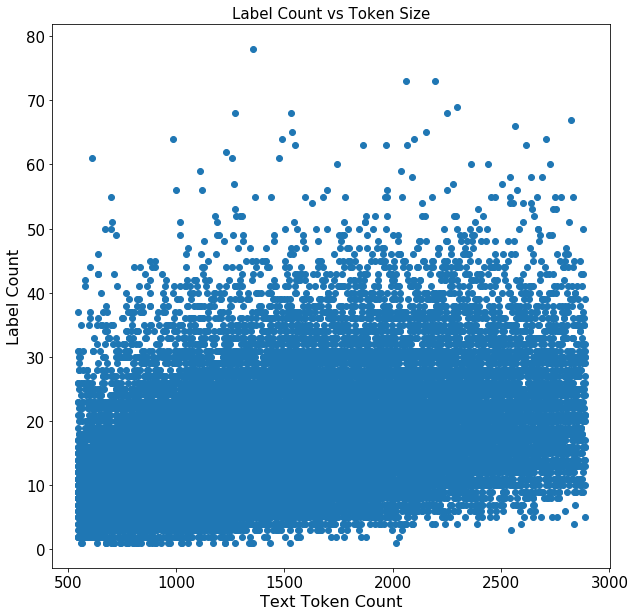

In [62]:
df_filter["label_count"] = df_filter["LABELS"].str.count(";") + 1

fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.set_title('Label Count vs Token Size', fontsize=15)
ax1.scatter(df_filter["length"], df_filter["label_count"])
ax1.set_ylabel("Label Count", fontsize=16)
ax1.set_xlabel("Text Token Count", fontsize=16)
fig1.savefig("label_length_correlation.png")

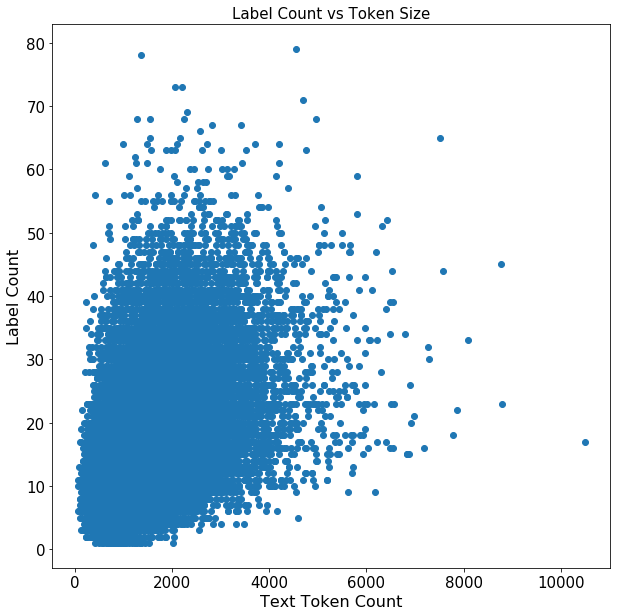

In [63]:
df_train["label_count"] = df_train["LABELS"].str.count(";") + 1

fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.set_title('Label Count vs Token Size', fontsize=15)
ax1.scatter(df_train["length"], df_train["label_count"])
ax1.set_ylabel("Label Count", fontsize=16)
ax1.set_xlabel("Text Token Count", fontsize=16)
fig1.savefig("label_length_correlation.png")

In [ ]:
for splt in ['train', 'dev', 'test']:
    filename = '%s/disch_%s_split.csv' % (MIMIC_3_DIR, splt)
    df = pd.read_csv(filename)
    df['length'] = df.apply(lambda row: len(str(row['TEXT']).split()), axis=1)
    df = df.sort_values(['length'])
    df.to_csv('%s/%s_full.csv' % (MIMIC_3_DIR, splt), index=False)